<a href="https://colab.research.google.com/github/meesumabidi/House-Price-Prediction/blob/main/house_price_preddiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install keras

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [ ]:
my_data = pd.read_csv('../content/Property_with_Feature_Engineering.csv')

In [ ]:
  my_frame = pd.DataFrame(my_data)
  my_frame.head()

,property_id,location_id,page_url,property_type,price,price_bin,location,city,province_name,locality,latitude,longitude,baths,area,area_marla,area_sqft,purpose,bedrooms,date_added,year,month,day,agency,agent
0,347795,8,https://www.zameen.com/Property/lahore_model_t...,House,220000000.0,Very High,Model Town,Lahore,Punjab,"Model Town, Lahore, Punjab",31.483869,74.325686,0.0,6 Kanal,120.0,32670.12,For Sale,0.0,07-17-2019,2019.0,7.0,17.0,Real Biz International,Usama Khan
1,482892,48,https://www.zameen.com/Property/lahore_multan_...,House,40000000.0,Very High,Multan Road,Lahore,Punjab,"Multan Road, Lahore, Punjab",31.431593,74.179980,5.0,1 Kanal,20.0,5445.02,For Sale,5.0,10-06-2018,2018.0,10.0,6.0,Khan Estate,mohsinkhan and B
2,555962,75,https://www.zameen.com/Property/eden_eden_aven...,House,9500000.0,Low,Eden,Lahore,Punjab,"Eden, Lahore, Punjab",31.499348,74.416959,0.0,9 Marla,9.0,2450.26,For Sale,3.0,07-03-2019,2019.0,7.0,3.0,Shahum Estate 2,"Babar Hameed, Raja Omar"
3,562843,3821,https://www.zameen.com/Property/gulberg_2_gulb...,House,125000000.0,Very High,Gulberg,Lahore,Punjab,"Gulberg, Lahore, Punjab",31.522069,74.355512,7.0,1 Kanal,20.0,5445.02,For Sale,8.0,04-04-2019,2019.0,4.0,4.0,NaN,NaN
4,686990,3522,https://www.zameen.com/Property/allama_iqbal_t...,House,21000000.0,High,Allama Iqbal Town,Lahore,Punjab,"Allama Iqbal Town, Lahore, Punjab",31.506483,74.286017,5.0,11 Marla,11.0,2994.76,For Sale,6.0,04-04-2019,2019.0,4.0,4.0,NaN,NaN


In [ ]:
my_frame.shape

(91624, 24)

In [ ]:
  my_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91624 entries, 0 to 91623
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_id    91624 non-null  int64  
 1   location_id    91624 non-null  int64  
 2   page_url       91624 non-null  object 
 3   property_type  91624 non-null  object 
 4   price          91623 non-null  float64
 5   price_bin      91623 non-null  object 
 6   location       91623 non-null  object 
 7   city           91623 non-null  object 
 8   province_name  91623 non-null  object 
 9   locality       91623 non-null  object 
 10  latitude       91623 non-null  float64
 11  longitude      91623 non-null  float64
 12  baths          91623 non-null  float64
 13  area           91623 non-null  object 
 14  area_marla     91623 non-null  float64
 15  area_sqft      91623 non-null  float64
 16  purpose        91623 non-null  object 
 17  bedrooms       91623 non-null  float64
 18  date_a

In [ ]:
my_frame.describe()


,property_id,location_id,price,latitude,longitude,baths,area_marla,area_sqft,bedrooms,year,month,day
count,9.162400e+04,91624.000000,9.162300e+04,91623.000000,91623.000000,91623.000000,91623.000000,9.162300e+04,91623.000000,91623.000000,91623.000000,91623.000000
mean,1.420909e+07,4303.310159,1.815234e+07,29.901049,71.359142,3.139026,11.818095,3.217487e+03,3.297393,2018.865656,5.639861,11.374808
std,2.400221e+06,3709.966579,3.811969e+07,3.747591,3.146211,2.233072,67.618439,1.840919e+04,1.991487,0.341023,2.458273,7.895034
min,8.657500e+04,1.000000,0.000000e+00,11.052446,25.906027,0.000000,0.000000,0.000000e+00,0.000000,2018.000000,1.000000,1.000000
25%,1.302839e+07,1127.000000,1.100000e+05,24.938913,67.125883,2.000000,4.800000,1.306800e+03,2.000000,2019.000000,4.000000,5.000000
50%,1.501130e+07,3283.000000,7.600000e+06,31.462347,73.074158,3.000000,7.100000,1.932980e+03,3.000000,2019.000000,6.000000,7.000000
75%,1.602027e+07,7184.000000,1.950000e+07,33.550096,74.210501,5.000000,12.000000,3.267010e+03,5.000000,2019.000000,7.000000,18.000000
max,1.669932e+07,13971.000000,2.000000e+09,73.184088,80.161430,11.000000,12000.000000,3.267012e+06,18.000000,2019.000000,12.000000,30.000000


In [ ]:
my_frame.dtypes

property_id        int64
location_id        int64
page_url          object
property_type     object
price            float64
price_bin         object
location          object
city              object
province_name     object
locality          object
latitude         float64
longitude        float64
baths            float64
area              object
area_marla       float64
area_sqft        float64
purpose           object
bedrooms         float64
date_added        object
year             float64
month            float64
day              float64
agency            object
agent             object
dtype: object

In [ ]:
my_frame.isnull().sum()

property_id          0
location_id          0
page_url             0
property_type        0
price                1
price_bin            1
location             1
city                 1
province_name        1
locality             1
latitude             1
longitude            1
baths                1
area                 1
area_marla           1
area_sqft            1
purpose              1
bedrooms             1
date_added           1
year                 1
month                1
day                  1
agency           39409
agent            39409
dtype: int64

In [ ]:
my_frame.columns.unique()


Index(['property_id', 'location_id', 'page_url', 'property_type', 'price',
       'price_bin', 'location', 'city', 'province_name', 'locality',
       'latitude', 'longitude', 'baths', 'area', 'area_marla', 'area_sqft',
       'purpose', 'bedrooms', 'date_added', 'year', 'month', 'day', 'agency',
       'agent'],
      dtype='object')

In [ ]:
my_frame.nunique()

property_id      91624
location_id       3969
page_url         91624
property_type        8
price             1600
price_bin            4
location          1455
city                 5
province_name        3
locality          1531
latitude          7102
longitude         7600
baths               12
area               302
area_marla         301
area_sqft          301
purpose              2
bedrooms            18
date_added         146
year                 2
month               12
day                 30
agency            4470
agent             7539
dtype: int64

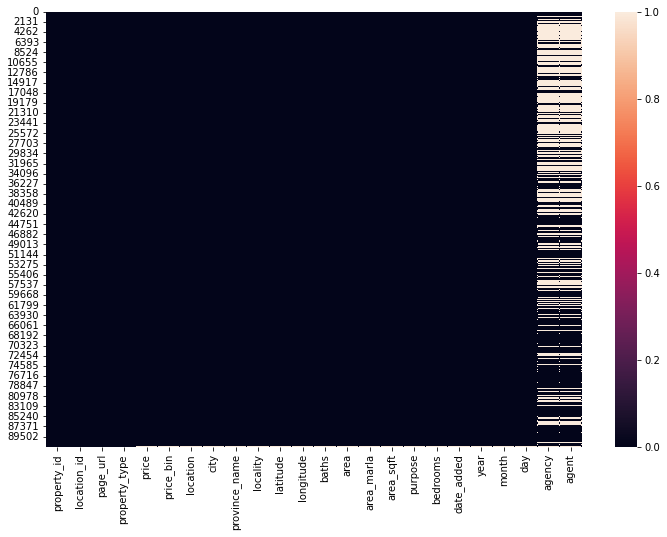

In [ ]:
fig = plt.figure(figsize = (12, 8))
sns.heatmap(my_frame.isnull())

In [ ]:
my_frame.count()

property_id      91624
location_id      91624
page_url         91624
property_type    91624
price            91623
price_bin        91623
location         91623
city             91623
province_name    91623
locality         91623
latitude         91623
longitude        91623
baths            91623
area             91623
area_marla       91623
area_sqft        91623
purpose          91623
bedrooms         91623
date_added       91623
year             91623
month            91623
day              91623
agency           52215
agent            52215
dtype: int64

In [ ]:
my_frame.corr()

,property_id,location_id,price,latitude,longitude,baths,area_marla,area_sqft,bedrooms,year,month,day
property_id,1.000000,0.010335,-0.009388,-0.033407,-0.013439,-0.056833,-0.001777,-0.001777,-0.043587,0.275058,-0.274808,-0.002846
location_id,0.010335,1.000000,-0.084540,-0.228096,-0.225515,-0.119207,-0.020331,-0.020331,-0.104208,-0.013983,0.010932,0.028194
price,-0.009388,-0.084540,1.000000,-0.085864,-0.061225,0.265966,0.164258,0.164258,0.293809,0.039577,0.003613,-0.073943
latitude,-0.033407,-0.228096,-0.085864,1.000000,0.919529,0.066220,0.021781,0.021781,0.026595,0.038825,-0.059378,-0.261598
longitude,-0.013439,-0.225515,-0.061225,0.919529,1.000000,0.094005,0.020996,0.020996,0.048419,0.045897,-0.054068,-0.220082
baths,-0.056833,-0.119207,0.265966,0.066220,0.094005,1.000000,0.036528,0.036528,0.773996,-0.005156,0.063632,-0.057011
area_marla,-0.001777,-0.020331,0.164258,0.021781,0.020996,0.036528,1.000000,1.000000,0.037006,0.010204,-0.007910,-0.008124
area_sqft,-0.001777,-0.020331,0.164258,0.021781,0.020996,0.036528,1.000000,1.000000,0.037006,0.010204,-0.007910,-0.008124
bedrooms,-0.043587,-0.104208,0.293809,0.026595,0.048419,0.773996,0.037006,0.037006,1.000000,-0.003269,0.061847,-0.062503
year,0.275058,-0.013983,0.039577,0.038825,0.045897,-0.005156,0.010204,0.010204,-0.003269,1.000000,-0.720784,-0.089040


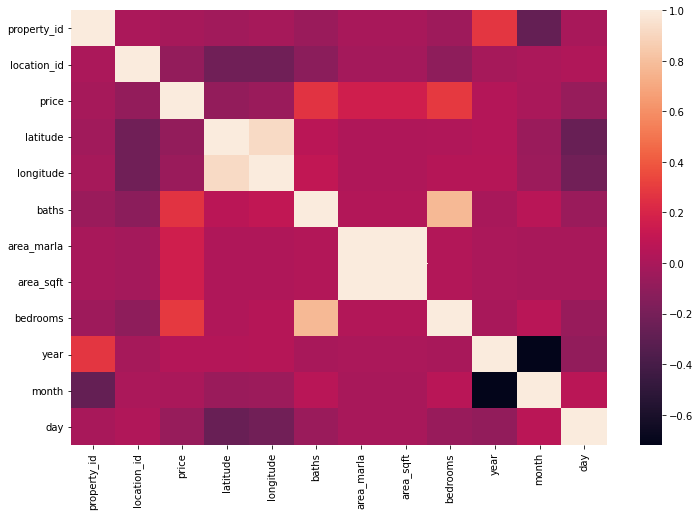

In [ ]:
fig = plt.figure(figsize = (12, 8))
sns.heatmap(my_frame.corr(), xticklabels = my_frame.corr().columns.values, yticklabels = my_frame.corr().columns.values)

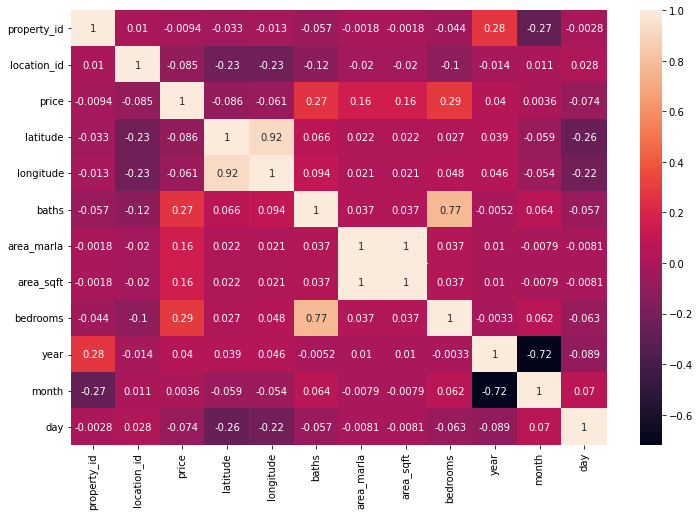

In [ ]:
fig = plt.figure(figsize = (12, 8))
sns.heatmap(my_frame.corr(), xticklabels = my_frame.corr().columns.values, yticklabels = my_frame.corr().columns.values, annot = True)

In [ ]:
my_frame.columns.unique()

Index(['property_id', 'location_id', 'page_url', 'property_type', 'price',
       'price_bin', 'location', 'city', 'province_name', 'locality',
       'latitude', 'longitude', 'baths', 'area', 'area_marla', 'area_sqft',
       'purpose', 'bedrooms', 'date_added', 'year', 'month', 'day', 'agency',
       'agent'],
      dtype='object')

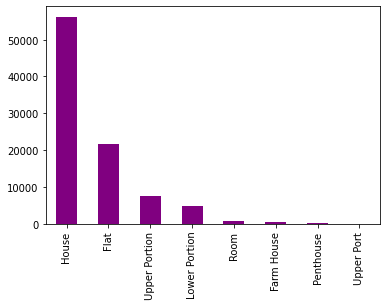

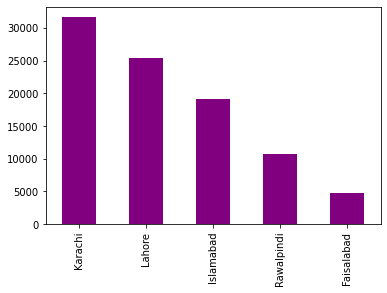

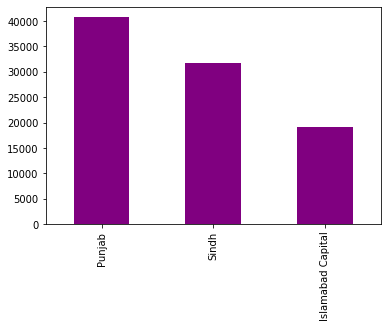

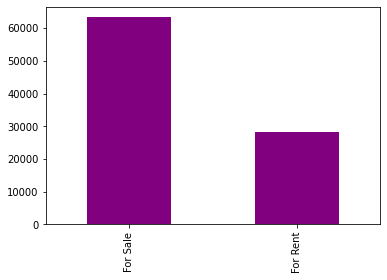

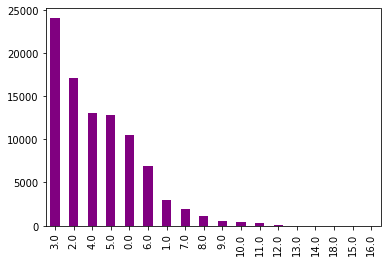

In [ ]:
# visualise the count of each category in categorical columns

categorical_features = ['property_type', 'city', 'province_name', 'purpose', 'bedrooms']

for i, cat_feature in enumerate(my_frame[categorical_features]):
    my_frame[cat_feature].value_counts().plot(kind = 'bar', color = 'purple')
    plt.show()

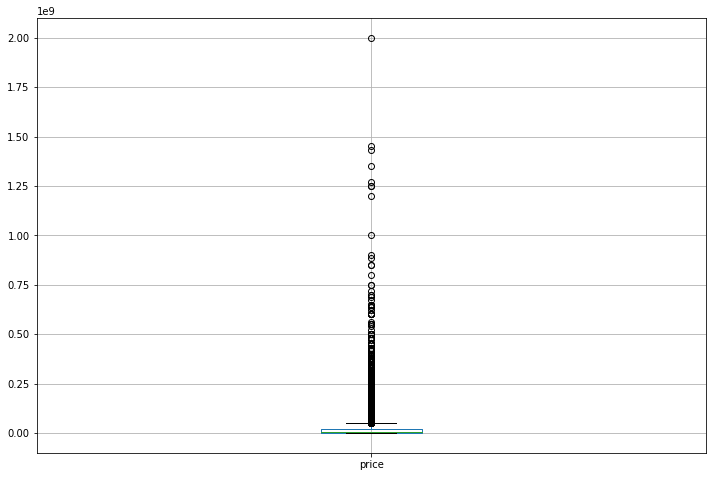

In [ ]:
# visualizing price column with a box plot

fig = plt.figure(figsize = (12, 8))
my_frame.boxplot(column = 'price')

In [ ]:
my_frame = my_frame.fillna('NA')

In [ ]:
my_frame.head()

,property_id,location_id,page_url,property_type,price,price_bin,location,city,province_name,locality,latitude,longitude,baths,area,area_marla,area_sqft,purpose,bedrooms,date_added,year,month,day,agency,agent
0,347795,8,https://www.zameen.com/Property/lahore_model_t...,House,2.2e+08,Very High,Model Town,Lahore,Punjab,"Model Town, Lahore, Punjab",31.4839,74.3257,0,6 Kanal,120,32670.1,For Sale,0,07-17-2019,2019,7,17,Real Biz International,Usama Khan
1,482892,48,https://www.zameen.com/Property/lahore_multan_...,House,4e+07,Very High,Multan Road,Lahore,Punjab,"Multan Road, Lahore, Punjab",31.4316,74.18,5,1 Kanal,20,5445.02,For Sale,5,10-06-2018,2018,10,6,Khan Estate,mohsinkhan and B
2,555962,75,https://www.zameen.com/Property/eden_eden_aven...,House,9.5e+06,Low,Eden,Lahore,Punjab,"Eden, Lahore, Punjab",31.4993,74.417,0,9 Marla,9,2450.26,For Sale,3,07-03-2019,2019,7,3,Shahum Estate 2,"Babar Hameed, Raja Omar"
3,562843,3821,https://www.zameen.com/Property/gulberg_2_gulb...,House,1.25e+08,Very High,Gulberg,Lahore,Punjab,"Gulberg, Lahore, Punjab",31.5221,74.3555,7,1 Kanal,20,5445.02,For Sale,8,04-04-2019,2019,4,4,NA,NA
4,686990,3522,https://www.zameen.com/Property/allama_iqbal_t...,House,2.1e+07,High,Allama Iqbal Town,Lahore,Punjab,"Allama Iqbal Town, Lahore, Punjab",31.5065,74.286,5,11 Marla,11,2994.76,For Sale,6,04-04-2019,2019,4,4,NA,NA


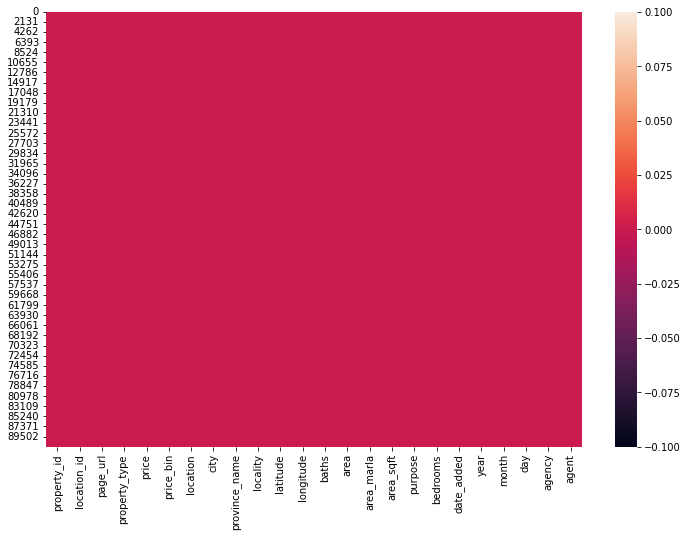

In [ ]:
fig = plt.figure(figsize = (12, 8))
sns.heatmap(my_frame.isnull())

In [ ]:
my_frame.columns.unique()

Index(['property_id', 'location_id', 'page_url', 'property_type', 'price',
       'price_bin', 'location', 'city', 'province_name', 'locality',
       'latitude', 'longitude', 'baths', 'area', 'area_marla', 'area_sqft',
       'purpose', 'bedrooms', 'date_added', 'year', 'month', 'day', 'agency',
       'agent'],
      dtype='object')

In [ ]:
my_frame = my_frame.drop(
    ['property_id','location_id','page_url','location','latitude','longitude','area',
     'date_added','agency','agent', 'price_bin', 'locality'], axis = 1)

In [ ]:
my_frame.head()

,property_type,price,city,province_name,baths,area_marla,area_sqft,purpose,bedrooms,year,month,day
0,House,2.2e+08,Lahore,Punjab,0,120,32670.1,For Sale,0,2019,7,17
1,House,4e+07,Lahore,Punjab,5,20,5445.02,For Sale,5,2018,10,6
2,House,9.5e+06,Lahore,Punjab,0,9,2450.26,For Sale,3,2019,7,3
3,House,1.25e+08,Lahore,Punjab,7,20,5445.02,For Sale,8,2019,4,4
4,House,2.1e+07,Lahore,Punjab,5,11,2994.76,For Sale,6,2019,4,4


In [ ]:
my_frame['property_type'] = my_frame['property_type'].astype('category').cat.codes
my_frame['city'] = my_frame['city'].astype('category').cat.codes
my_frame['province_name'] = my_frame['province_name'].astype('category').cat.codes
my_frame['purpose'] = my_frame['purpose'].astype('category').cat.codes

In [ ]:
my_frame.head()

,property_type,price,city,province_name,baths,area_marla,area_sqft,purpose,bedrooms,year,month,day
0,2,2.2e+08,3,2,0,120,32670.1,1,0,2019,7,17
1,2,4e+07,3,2,5,20,5445.02,1,5,2018,10,6
2,2,9.5e+06,3,2,0,9,2450.26,1,3,2019,7,3
3,2,1.25e+08,3,2,7,20,5445.02,1,8,2019,4,4
4,2,2.1e+07,3,2,5,11,2994.76,1,6,2019,4,4


In [ ]:
x = my_frame[['property_type', 'city', 'province_name', 'baths', 'purpose', 'bedrooms', 'area_sqft']]
x = my_frame.drop('price', axis = 1)
y = my_frame['price']
my_frame['price']

0         2.2e+08
1           4e+07
2         9.5e+06
3        1.25e+08
4         2.1e+07
           ...   
91619       45000
91620       32000
91621       55000
91622       90000
91623          NA
Name: price, Length: 91624, dtype: object

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 35)

In [ ]:
from sklearn.linear_model import LinearRegression
reg_model = LinearRegression()

In [ ]:
reg_model.fit(x_train, y_train)

ValueError: ignored

In [ ]:
lin_y_pred = reg_model.predict(x_test)

In [ ]:
lr_data = pd.DataFrame({'Actual' : y_test, 'Predicted' : lin_y_pred})
lr_data

NameError: ignored

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor()
forest_model.fit(x_train, y_train)
forest_y_pred = forest_model.predict(x_test)
forest_data = pd.DataFrame({'Actual' : y_test, 'Predicted' : forest_y_pred})
forest_data

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print('Linear Regression Mean Square Error:', mean_squared_error(y_test, lin_y_pred))
print('Linear Regression R2 Score:', r2_score(y_test, lin_y_pred))

print('Random Forest Regressor Mean Square Error:', mean_squared_error(y_test, forest_y_pred))
print('Random Forest Regressor R2 Score:', r2_score(y_test, forest_y_pred))

In [ ]:
import pickle
pickle_out = open("regression_model.pkl", "wb")
pickle.dump(reg_model, pickle_out)
pickle_out.close()

In [ ]:
pickle_out1 = open("forest_model.pkl", "wb")
pickle.dump(forest_model, pickle_out1)
pickle_out1.close()

In [ ]:
x_train.head()